In [219]:
%matplotlib inline
from bs4 import BeautifulSoup
from html.parser import HTMLParser
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split

from datetime import datetime
import os
import os.path
import sys
import pickle
import pprint
import time
import urllib.request, urllib.parse, urllib.error
from urllib import request as urlrequest

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [220]:
def ldf_display(df, lines=500):
    txt = ("<iframe " +
           "srcdoc='" + df.head(lines).to_html() + "' " +
           "width=1000 height=500>" +
           "</iframe>")

    return IPython.display.HTML(txt)

In [221]:
current_path = os.getcwd()
project_path = os.path.dirname(current_path)
print(project_path+"/data/cache")

/Users/moming2k/project/TradingProjects/HKHorseDB/data/cache


In [222]:
html_cache = project_path+"/data/cache"
save_path = project_path+"/data/race_records"
summary_path = project_path+"/data/race_summary"

In [223]:
def get_cache_path(url):
    url_path = urllib.parse.quote(url).replace('/', '_')
    file_path = "{}/{}".format(html_cache, url_path)
    return file_path

demo_url = get_cache_path("http://hk.racing.nextmedia.com/fullresult.php?date=20130206&page=05")
print(demo_url)

def is_cache_html(url):
    filepath = get_cache_path(url)
    if(os.path.isfile(filepath)):
        return True
    else:
        return False

/Users/moming2k/project/TradingProjects/HKHorseDB/data/cache/http%3A__hk.racing.nextmedia.com_fullresult.php%3Fdate%3D20130206%26page%3D05


In [224]:
def get_cache_html(url):
    filepath = get_cache_path(url)
    if(os.path.isfile(filepath)):
        print("url = {} exist in cache".format(url))
        with open(filepath, 'r') as io_file:
            html = io_file.read()        
        return html
    else:
        print("url = {} not exist in cache".format(url))
        return None

In [225]:
def acquire_total_race(date_str):
    url = 'http://hk.racing.nextmedia.com/fullresult.php?date={}&page=01'.format(date_str)

    if is_cache_html(url):
        html = get_cache_html(url)
    else:
        html = get(url)
        html = str(html, 'utf-8')
        set_cache_html(url, html)
        
    soup = BeautifulSoup(html, "html.parser")
    try:
        return len(soup.findAll('table')[1].findAll('tr')[0].findAll('td')[0].findAll('a', href=True))
    except Exception as err:
        return -1

def get_race_date_array():
    url = 'http://www.hkhorsedb.com/cseh/passodds.php'
    
    if is_cache_html(url):
        html = get_cache_html(url)
    else:
        html = get(url)
        html = str(html, 'big5')
        set_cache_html(url, html)
        
    soup = BeautifulSoup(html, "html.parser")
    tr_list = soup.findAll('table')[15].findAll('tr')[1:]
    
    race_date_array = []
    
    for i in range(0, len(tr_list)-1):
        tr = tr_list[i]
        tds = tr.findAll('td')
        
        for j in range(0, len(tds)):
            detail_date = tds[j].text
            
            if (detail_date != "-"):
                normal_data = ''.join(reversed(detail_date.split('-')))
                
                if(normal_data != ""):
                    race_date_array.append(normal_data)
    
    return race_date_array
    


In [226]:
use_cache_race_date_array = True

if use_cache_race_date_array:
    race_date_array = pickle.load( open( "race_date_array.p", "rb" ) )
else:
    race_date_array = get_race_date_array()
    pickle.dump( race_date_array, open( "race_date_array.p", "wb" ) )

print(race_date_array[0:10])
print(race_date_array[-10:])

['20170625', '20170621', '20170618', '20170614', '20170611', '20170607', '20170604', '20170531', '20170528', '20170524']
['20051120', '20051116', '20051113', '20051109', '20051105', '20051101', '20051030', '20051026', '20051022', '20051019']


In [227]:
race_date = race_date_array[0]

In [228]:
count = acquire_total_race(race_date)

url = http://hk.racing.nextmedia.com/fullresult.php?date=20170625&page=01 exist in cache


In [229]:
def create_csv_array():
    csv_array = []

    for race_date in race_date_array:
        for index in range(1, count+1):
            race_index = str(index).zfill(2)
            filename = '{}_{}'.format(race_date, race_index)
#             print(filename)
            csv_array.append(filename)

    return csv_array

In [230]:
use_cache_csv_array = True
csv_array = []

if use_cache_csv_array:
    csv_array = pickle.load( open( "race_csv_array.p", "rb" ) )
else:
    csv_array = create_csv_array()
    pickle.dump( csv_array, open( "race_csv_array.p", "wb" ) )
    
print(len(csv_array))
print(csv_array[0:20])
print(csv_array[-10:])

9530
['20170625_01', '20170625_02', '20170625_03', '20170625_04', '20170625_05', '20170625_06', '20170625_07', '20170625_08', '20170625_09', '20170625_10', '20170621_01', '20170621_02', '20170621_03', '20170621_04', '20170621_05', '20170621_06', '20170621_07', '20170621_08', '20170621_09', '20170621_10']
['20051019_01', '20051019_02', '20051019_03', '20051019_04', '20051019_05', '20051019_06', '20051019_07', '20051019_08', '20051019_09', '20051019_10']


In [231]:
def load_race_data_csv(race_date):
    filename = '{}/{}.cvs'.format(save_path,race_date)
    df=pd.read_csv(filename, sep=',',header=0)
    return df
#     print(df)
    
load_race_data_csv(csv_array[0])

,Date,RaceNumber,HorseNo,HorseName,Age,JockeyName,ActualWt,Draw,Rate,Owner,...,WinOddBeforeGate,WinOdd,WinInTenThousand,PInTenThousand,P_Odd,PlaceInMiddle,Place,TimeInMiddle,FinishTime,LBW
0,20170625,1,3,盛勢,4,韋達,132,8,39,葉,...,7.3,6.5,275.0,190.0,2.7,12 10 11,1,14.15 21.63 23.38 23.32,(1.22.48),頭馬
1,20170625,1,8,銘記心中,5,李寶利,121,2,28,吳,...,4.0,4.5,395.0,334.0,1.5,3 6 3,2,13.67 21.67 23.34 23.98,(1.22.66),1-1/4
2,20170625,1,2,葵涌老友,4,潘明輝,123,6,40,高,...,6.6,8.0,222.0,211.0,2.5,9 7 8,3,13.99 21.59 23.42 23.75,(1.22.75),1-3/4
3,20170625,1,11,電訊大炮,4,黃皓楠,108,1,19,徐,...,9.6,8.7,204.0,193.0,2.7,2 4 2,4,13.67 21.51 23.26 24.32,(1.22.76),1-3/4
4,20170625,1,6,金武士,5,何澤堯,122,9,31,方,...,11.0,13.0,130.0,121.0,4.3,7 9 9,5,13.83 21.83 23.42 23.86,(1.22.94),2-3/4
5,20170625,1,5,好準確,5,郭能,131,12,38,蘇,...,24.0,21.0,83.0,78.0,6.6,13 12 13,6,14.23 21.83 23.18 23.83,(1.23.07),3-3/4
6,20170625,1,1,架勢堂,3,祈普敦,133,14,40,摩,...,33.0,20.0,86.0,76.0,6.8,10 11 10,7,14.03 21.83 23.3 24.13,(1.23.29),5
7,20170625,1,12,飛壹般,4,楊明綸,111,10,18,李,...,29.0,19.0,92.0,105.0,4.9,11 13 12,8,14.07 21.99 23.18 24.34,(1.23.58),6-3/4
8,20170625,1,13,牛魔王,6,賴維銘,113,5,13,告,...,66.0,111.0,16.0,22.0,23.0,14 14 14,9,14.35 21.95 23.06 24.48,(1.23.84),8-1/2
9,20170625,1,7,勁伶利,4,潘頓,123,11,30,東,...,22.0,18.0,94.0,97.0,5.4,5 5 6,10,13.67 21.63 23.62 25.05,(1.23.97),9-1/4


In [232]:
def concat_pd_race_data():
    csv_pd_array = []
    for race_date in csv_array:
        try:
            csv_pd_array.append( load_race_data_csv(race_date))
        except Exception as err:
            print('missing data for race date {}', race_date)
    
    print(len(csv_pd_array))
    race_date_concat = pd.concat(csv_pd_array, ignore_index=True)
    return race_date_concat

In [233]:
# race_date_concat = pd.concat(csv_pd_array)

In [234]:
# print(race_date_concat[0:20])
# print(race_date_concat[-10:])
# print(race_date_concat)

In [235]:
use_cache_pd_array = True
pd_array = []

if use_cache_pd_array:
    pd_array = pickle.load( open( "race_date_concat.p", "rb" ) )
else:
    pd_array = concat_pd_race_data()
    print(pd_array)
    pickle.dump( pd_array, open( "race_date_concat.p", "wb" ) )

In [236]:
# print(pd_array[0:20])
# print(pd_array[-10:])
pd_array.head()

pd_array.to_excel(os.path.join(summary_path, 'array.xlsx'), index=False)
# pd_array.to_csv(os.path.join(summary_path, 'array.cvs'), index=False)

# ldf_display(pd_array)

### Dummy variables
Here we have some categorical variables like season, weather, month. To include these in our model, we'll need to make binary dummy variables. This is simple to do with Pandas thanks to `get_dummies()`.

In [237]:
after_process = pd_array

# dummy_fields = ['Age', 'Draw']
# for each in dummy_fields:
#     dummies = pd.get_dummies(after_process[each], prefix=each, drop_first=False)
#     after_process = pd.concat([after_process, dummies], axis=1)

fields_to_drop = ['ActualWt', 
                  'Rate',
                  'DeclarHorseWt', 
                  'Date', 
                  'HorseNo', 
                  'RaceNumber', 
                  'Age', 
                  'Draw',  
                  'HorseName', 
                  'JockeyName', 
                  'Owner', 
                  'WinOddBeforeNight', 
                  'WinOddBeforeGate', 
                  'WinInTenThousand', 
                  'PInTenThousand', 
                  'PlaceInMiddle', 
                  'TimeInMiddle', 
                  'FinishTime', 
                  'LBW', 
                  'P_Odd']
data = after_process.drop(fields_to_drop, axis=1)
data.head()

# len(data)

# data_new = data.drop(data[data.Place.dtype.kind == 'str'].index)

,WinOdd,Place
0,6.5,1
1,4.5,2
2,8.0,3
3,8.7,4
4,13.0,5


In [238]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 45):
    print(data[0:1])
    print(data[1:2])
    print(data[100:101])

   WinOdd Place
0     6.5     1
   WinOdd Place
1     4.5     2
     WinOdd Place
100    36.0     7


In [239]:
pd_array.loc[pd_array['WinOdd'] < 2].loc[pd_array['WinOdd'] >1]

,Date,RaceNumber,HorseNo,HorseName,Age,JockeyName,ActualWt,Draw,Rate,Owner,...,WinOddBeforeGate,WinOdd,WinInTenThousand,PInTenThousand,P_Odd,PlaceInMiddle,Place,TimeInMiddle,FinishTime,LBW
14,20170625,2,6,旅遊皇者,3,莫雷拉,126,14,52,沈,...,1.6,1.4,1279,379,1,4 3,1,13.37 20.44 22.38,(0.56.19),頭馬
32,20170625,3,1,巴基之星,4,莫雷拉,133,3,113,東,...,1.1,1.2,627,302,1,5 5 5 5,5,15.23 0,(2.47.1),
37,20170625,4,5,天下為攻,3,李寶利,125,2,69,蔡,...,1.5,1.5,1681,542,1.1,5 4,4,24.55 22.27 22.58,(1.09.4),1-1/2
75,20170625,7,4,勝得威,4,潘頓,120,3,110,東,...,2.1,1.8,1204,458,1,3 3 3,2,13.38 22.12 23.32 22.61,(1.21.43),3-1/2
299,20170618,8,8,真好彩,4,莫雷拉,121,5,71,呂,...,1.5,1.6,1794,554,1,2 1,1,24.13 22.57 22.61,(1.09.31),頭馬
324,20170618,10,9,小巨人,4,潘頓,122,2,85,賀,...,1.4,1.6,1859,706,1,6 6,3,24.13 22.74 23.04,(1.09.91),2-1/4
424,20170611,1,3,鞍歌,3,潘頓,128,11,55,姚,...,1.8,1.6,1257,419,1.1,2 1,2,13.13 20.41 23.36,(0.56.9),短頭
500,20170611,7,5,爭分奪秒,3,莫雷拉,128,7,91,蔡,...,2.1,1.7,1482,478,1,4 4 2,1,13.92 22.84 22.61 22.45,(1.21.82),頭馬
648,20170604,1,3,幸運大師,3,史卓豐,129,3,0,高,...,1.3,1.1,725,315,1,1 1,1,25.54 23.15 22.28,(1.10.97),頭馬
654,20170604,2,1,天下為攻,3,李寶利,133,4,59,蔡,...,1.5,1.4,1092,298,1,3 3,1,24.88 22.78 22.19,(1.09.85),頭馬


In [240]:
print(data['WinOdd'].min())

0.0


### Clean up data

Before do the scaling, remove rows that contain invalid data. 

For Place, it is possible to contain "-" if it haven't finish the race. So we need to remove that.


In [241]:
# drop_target_array = []
# for index, row in data.iterrows():
#     print("index = {} , value = {}", index, row.Place)
#     if row.Place == '-':
#         drop_target_array.append(index)
        
# print(drop_target_array)

invalid_keyword = ['被貶', '5平頭馬', '4 併頭馬', '6併頭馬', '-']
for each in invalid_keyword:
    row_contain_invalid_data = data[data.Place==each].index.values
    data = data.drop(row_contain_invalid_data)
    
# Convert Number in String to integer
data.Place = pd.to_numeric(data.Place, errors='coerce')

# another way is use mapping to replace, but need to do it one by one
# df.replace({'set': mapping, 'tesst': mapping})

print(len(data))

s = pd.Series(data.Place.values)
print(s.unique())

# data['Place'].mean()

104981
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


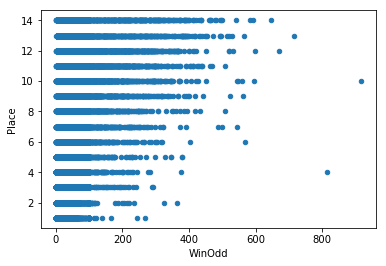

In [242]:
data.plot.scatter(y='Place', x='WinOdd')

In [243]:
data.loc[data['WinOdd'] < 2].loc[data['Place'] < 1]

,WinOdd,Place


In [244]:
len(data)

104981

In [245]:
len(data.loc[data['WinOdd'] < 2])

887

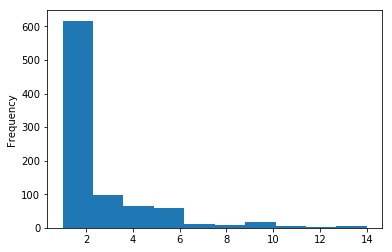

In [246]:
data.loc[data['WinOdd'] < 2,"Place"].plot.hist()

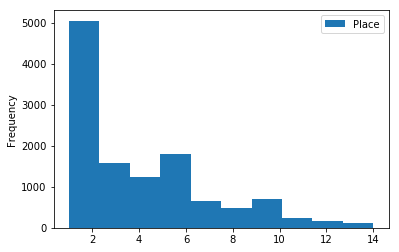

In [247]:
data.loc[data['WinOdd'] > 2].loc[data['WinOdd'] < 5,['Place']].plot.hist()

In [248]:
data.loc[data['WinOdd'] >= 5].loc[data['Place'] == 1]

,WinOdd,Place
0,6.5,1
28,12.0,1
34,12.0,1
74,5.1,1
82,7.9,1
94,6.2,1
106,5.2,1
120,10.0,1
156,8.0,1
180,5.9,1


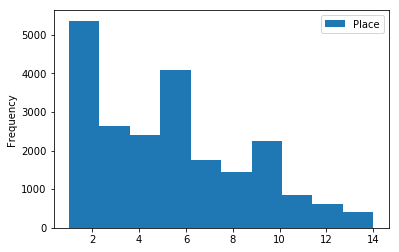

In [249]:
data.loc[data['WinOdd'] > 5].loc[data['WinOdd'] < 10,['Place']].plot.hist()

In [250]:
data.loc[data['WinOdd'] > 10]

,WinOdd,Place
4,13.0,5
5,21.0,6
6,20.0,7
7,19.0,8
8,111.0,9
9,18.0,10
11,24.0,12
12,144.0,13
13,24.0,14
15,16.0,2


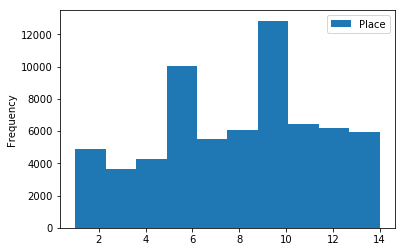

In [251]:
data.loc[data['WinOdd'] > 10,['Place']].plot.hist()

### Scaling target variables
To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [252]:
quant_features = [
#     'ActualWt', 
#     'Rate', 
#     'DeclarHorseWt', 
    'WinOdd'#, 
#     'Place'
    ]
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    print(each)
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

WinOdd


In [253]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 45):
    print(data[0:1])
    print(data[1:2])

     WinOdd  Place
0 -0.589454      1
     WinOdd  Place
1 -0.637982      2


### Separate the Data to Feature set and Label set

Place is the final result that we want

In [254]:
label_field = ['Place']

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

features, labels = data.drop(label_field, axis=1), data[label_field]

# labels /= 20

x_train, x_test, y_train, y_test = train_test_split(features.as_matrix(), labels.as_matrix(), test_size=0.33, shuffle=False) #, random_state=seed)

# x_train /= 255
# test_data = data[-10000:]
# train_data = data[:-10000]

# test_features, test_labels = test_data.drop(label_field, axis=1), test_data[label_field]
# train_features, train_labels = train_data.drop(label_field, axis=1), train_data[label_field]


In [255]:
print(features.as_matrix()[0])
print(labels.as_matrix()[0])

print(x_train[0])
print(y_train[0])

[-0.58945367]
[1]
[-0.58945367]
[1]


In [256]:
from keras.models import Sequential
from keras.callbacks import Callback

model = Sequential()

from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(60, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model = Sequential([
#     Dense(32, input_shape=(29,)),
#     Activation('relu'),
#     Dense(1),
#     Activation('sigmoid'),
# ])


In [257]:
# For a mean squared error regression problem
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [258]:
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_batch_end(self, batch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))
        
#     def on_epoch_end(self, epoch, logs={}):
        

In [259]:
# Train the model, iterating on the data in batches of 32 samples
hist = model.fit(features.as_matrix(), 
          labels.as_matrix(), 
#           validation_data=(x_test,y_test),
          epochs=10, 
#           show_accuracy=True,
          batch_size=32, 
          validation_split=0.2
#           validation_split=0.1,
#           shuffle=True#,
#           callbacks=[TestCallback((test_features.as_matrix(), test_labels.as_matrix()))]
                )

# print(hist.history)


ValueError: Error when checking input: expected dense_10_input to have shape (None, 2) but got array with shape (104981, 1)

In [ ]:
# from keras.utils import plot_model
# plot_model(model, to_file='model.png')

print(hist.history)

In [ ]:
model.predict(pd.DataFrame([[-0.58945367]]))